# Population by Country (2020)
##### Data source: https://www.kaggle.com/tanuprabhu/population-by-country-2020?select=population_by_country_2020.csv

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#sns.set()

In [2]:
# Loading the raw data into a pandas dataframe,
# Renaming the columns of interest,
# Creating a subset of the data in a new dataframe

raw_population_data = pd.read_csv('population_by_country_2020.csv')
raw_population_data.rename({'Country (or dependency)':'Country','Population (2020)':'Population',
                            'World Share':'World Share %'},
                            axis=1,
                            inplace=True)

population_data = raw_population_data[['Country','Population','Land Area (Km2)','Fert. Rate',
                                     'Med. Age','Urban Pop %','World Share %']]
#population_data = population_data[0:10]
population_data

,Country,Population,Land Area (Km2),Fert. Rate,Med. Age,Urban Pop %,World Share %
0,China,1440297825,9388211,1.7,38,61%,18.47%
1,India,1382345085,2973190,2.2,28,35%,17.70%
2,United States,331341050,9147420,1.8,38,83%,4.25%
3,Indonesia,274021604,1811570,2.3,30,56%,3.51%
4,Pakistan,221612785,770880,3.6,23,35%,2.83%
...,...,...,...,...,...,...,...
230,Montserrat,4993,100,N.A.,N.A.,10%,0.00%
231,Falkland Islands,3497,12170,N.A.,N.A.,66%,0.00%
232,Niue,1628,260,N.A.,N.A.,46%,0.00%
233,Tokelau,1360,10,N.A.,N.A.,0%,0.00%


### The focus of this analyses is on the top 10 most populated countries

In [3]:
# loading only the first 10 rows that contains the top 10 countries

top10_population_data = population_data[0:10]

# sorting using the least population for the bar chart to display as expected

#top10_population_data.sort_values('Population', inplace=True)
barchart_data = top10_population_data[::-1]  

## Ploting a horizontal bar chart

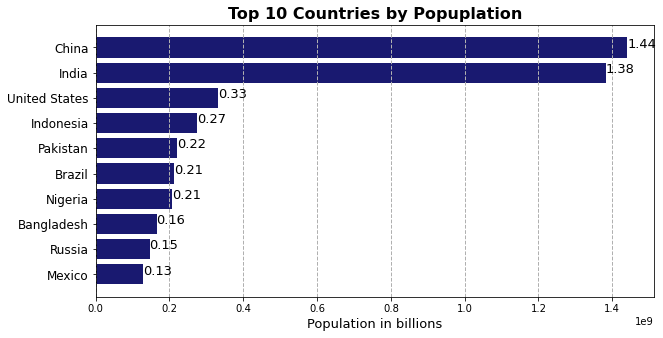

In [7]:
#Plotting a Horizontal Bar chart to display the top 10 most populated countries

fig, ax1 = plt.subplots(figsize = (10,5))
#ax1 = plt.subplot(1,1,1)
ax1.barh(barchart_data["Country"],
       barchart_data["Population"],
       color="midnightblue")

#ax1.set_ylabel("Countries", fontsize  = 13)
ax1.set_xlabel("Population in billions", fontsize  = 13)
#plt.xticks(top10_population_data["Population"], fontsize  = 12)
plt.yticks(fontsize  = 12)
ax1.set_xlim(0, barchart_data["Population"].max() * 1.05)  #increase the xlimits to accomodate the annotation.
ax1.xaxis.grid(linestyle = '--', linewidth = 1)

#setting the annotation with the population figaures 
for x, y in enumerate(barchart_data["Population"]):
    ax1.annotate(round(y/1000000000, 2), xy =(y, x), fontsize=13)
    
ax1.set_title("Top 10 Countries by Popuplation", fontsize  = 16, fontweight = "bold")
fig.savefig('topcountries.png')
plt.show()

## Ploting a Bar and Line Chart

In [8]:
#Loading the dataset
barlinechart_data = top10_population_data[::]

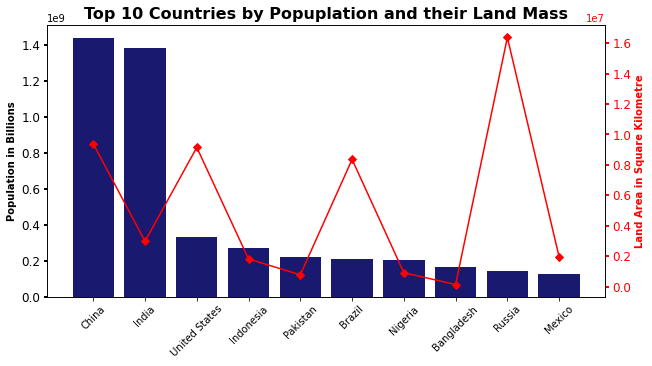

In [17]:
fig, ax2 = plt.subplots(figsize = (10,5))
ax2.bar(barlinechart_data["Country"],
       barlinechart_data["Population"],
       color="midnightblue")
plt.xticks(rotation = 45)
ax2.set_ylabel("Population in Billions", weight = "bold")
ax2.tick_params(axis = "y", width = 2, labelsize = "large")

ax3 = ax2.twinx()
ax3.plot(barlinechart_data["Country"],
       barlinechart_data["Land Area (Km2)"],
       color="red",
        marker = "D")
ax3.set_ylabel("Land Area in Square Kilometre", weight = "bold", color = "red")
ax3.tick_params(axis = "y", width = 2, labelsize = "large", colors="red")

ax3.set_title("Top 10 Countries by Popuplation and their Land Mass", fontsize  = 16, fontweight = "bold")
fig.savefig('bar and line chart.png')
plt.show()

In [18]:
#Storing the other countries in a different dataset to enabale us 
# obtain their aggregate

others = population_data[10:]
others = others.replace('N.A.',np.nan)
others = others.fillna(0)
others

,Country,Population,Land Area (Km2),Fert. Rate,Med. Age,Urban Pop %,World Share %
10,Japan,126407422,364555,1.4,48,92%,1.62%
11,Ethiopia,115434444,1000000,4.3,19,21%,1.47%
12,Philippines,109830324,298170,2.6,26,47%,1.41%
13,Egypt,102659126,995450,3.3,25,43%,1.31%
14,Vietnam,97490013,310070,2.1,32,38%,1.25%
...,...,...,...,...,...,...,...
230,Montserrat,4993,100,0,0,10%,0.00%
231,Falkland Islands,3497,12170,0,0,66%,0.00%
232,Niue,1628,260,0,0,46%,0.00%
233,Tokelau,1360,10,0,0,0%,0.00%


In [12]:
# removing the percentages to enable th sum fuction work properly
world_share = others['World Share %'].str.replace("%","")
world_share = world_share.fillna(0)
sum(world_share.astype(float))


ws = round(sum(world_share.astype(float)),2)

In [13]:
# Calculating the aggregates and storing the values in a new dataframe
df_others = pd.DataFrame({"Country" : ["Others"],
                          "Population" : [sum(others['Population'])],
                          "Land Area (Km2)" : [sum(others['Land Area (Km2)'])],
                          "World Share %" : [str(ws)+'%']})

In [14]:
df_others

,Country,Population,Land Area (Km2),World Share %
0,Others,3298940824,78282912,42.22%


In [19]:
# Combaining the top 10 popuation with the agrregates of the
# other countries in a new frame

worldPopulation = top10_population_data[['Country','Population','Land Area (Km2)','World Share %']]
worldPopulation = worldPopulation.append(df_others, ignore_index=True)
worldPopulation

,Country,Population,Land Area (Km2),World Share %
0,China,1440297825,9388211,18.47%
1,India,1382345085,2973190,17.70%
2,United States,331341050,9147420,4.25%
3,Indonesia,274021604,1811570,3.51%
4,Pakistan,221612785,770880,2.83%
5,Brazil,212821986,8358140,2.73%
6,Nigeria,206984347,910770,2.64%
7,Bangladesh,164972348,130170,2.11%
8,Russia,145945524,16376870,1.87%
9,Mexico,129166028,1943950,1.65%
